<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [380]:
import pandas as pd
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [381]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') #Добавляем разделить для правильного считывания данных

In [382]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [383]:
data.shape

(23699, 22)

In [384]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,nan,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,nan
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,nan,0.00,nan,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,...,nan,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,nan,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,nan,12.00,14.40,5,NaN,...,9.10,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,nan,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,nan,0.00,nan,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,nan,24.00,nan,22,NaN,...,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,nan,0.00,nan,nan
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,nan,27.00,15.43,26,NaN,...,8.81,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,nan,0.00,nan,289.00


In [385]:
data.sample()#Посмотрим на случаеное значение

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19585,19,1400000.00,40.00,2018-10-30T00:00:00,1,2.50,5.00,17.50,5,NaN,...,9.00,nan,посёлок станции Громово,nan,nan,nan,nan,nan,nan,20.00


In [386]:
data.describe()#

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


### Вывод 
 Явно видные проблемы:
* Очень много пропусков
* Не коректный тип колонок
* Проблемы с названием колонок
* Что есть апартаменты?

## Предобработка данных

In [387]:
# Переименуемы столбцы
data = data.rename(
    columns = {
        'rooms':'count_rooms',
        'floor':'number_floor',
        'studio':'is_studio',
        'open_plan':'is_open_plan',
        'balcony':'count_balcony',
        'cityCenters_nearest':'city_centers_nearset',
        'parks_around3000':'parks_around3km',
        'ponds_around3000':'ponds_around3km'
        
    }
)

In [388]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,count_rooms,ceiling_height,floors_total,living_area,number_floor,is_apartment,...,kitchen_area,count_balcony,locality_name,airports_nearest,city_centers_nearset,parks_around3km,parks_nearest,ponds_around3km,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,nan,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,nan
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,nan,0.00,nan,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,...,nan,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,nan,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,nan,12.00,14.40,5,NaN,...,9.10,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,nan,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,nan,0.00,nan,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,nan,24.00,nan,22,NaN,...,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,nan,0.00,nan,nan
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,nan,27.00,15.43,26,NaN,...,8.81,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,nan,0.00,nan,289.00


In [389]:
#Изменим порядок колонок на более логичный и более простой для восприятие информации
data = data.reindex(
    columns=[
        'total_images',
        'last_price',
        'locality_name',
        'total_area',
        'living_area',
        'kitchen_area',
        'floors_total',
        'number_floor',
        'count_rooms',
        'ceiling_height',
        'count_balcony',
        'is_apartment',
        'is_studio',
        'is_open_plan',
        'airports_nearest',
        'city_centers_nearset',
        'parks_around3km',
        'parks_nearest',
        'ponds_around3km',
        'ponds_nearest',
        'first_day_exposition',
        'days_exposition'
    ]
)

In [390]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
locality_name           23650 non-null object
total_area              23699 non-null float64
living_area             21796 non-null float64
kitchen_area            21421 non-null float64
floors_total            23613 non-null float64
number_floor            23699 non-null int64
count_rooms             23699 non-null int64
ceiling_height          14504 non-null float64
count_balcony           12180 non-null float64
is_apartment            2775 non-null object
is_studio               23699 non-null bool
is_open_plan            23699 non-null bool
airports_nearest        18157 non-null float64
city_centers_nearset    18180 non-null float64
parks_around3km         18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3km         18181 non-null float64
ponds_nearest 

In [391]:
data.head(10)
#Теперь информация читается намного проще

,total_images,last_price,locality_name,total_area,living_area,kitchen_area,floors_total,number_floor,count_rooms,ceiling_height,...,is_studio,is_open_plan,airports_nearest,city_centers_nearset,parks_around3km,parks_nearest,ponds_around3km,ponds_nearest,first_day_exposition,days_exposition
0,20,13000000.00,Санкт-Петербург,108.00,51.00,25.00,16.00,8,3,2.70,...,False,False,18863.00,16028.00,1.00,482.00,2.00,755.00,2019-03-07T00:00:00,nan
1,7,3350000.00,посёлок Шушары,40.40,18.60,11.00,11.00,1,1,nan,...,False,False,12817.00,18603.00,0.00,nan,0.00,nan,2018-12-04T00:00:00,81.00
2,10,5196000.00,Санкт-Петербург,56.00,34.30,8.30,5.00,4,2,nan,...,False,False,21741.00,13933.00,1.00,90.00,2.00,574.00,2015-08-20T00:00:00,558.00
3,0,64900000.00,Санкт-Петербург,159.00,nan,nan,14.00,9,3,nan,...,False,False,28098.00,6800.00,2.00,84.00,3.00,234.00,2015-07-24T00:00:00,424.00
4,2,10000000.00,Санкт-Петербург,100.00,32.00,41.00,14.00,13,2,3.03,...,False,False,31856.00,8098.00,2.00,112.00,1.00,48.00,2018-06-19T00:00:00,121.00
5,10,2890000.00,городской посёлок Янино-1,30.40,14.40,9.10,12.00,5,1,nan,...,False,False,nan,nan,nan,nan,nan,nan,2018-09-10T00:00:00,55.00
6,6,3700000.00,посёлок Парголово,37.30,10.60,14.40,26.00,6,1,nan,...,False,False,52996.00,19143.00,0.00,nan,0.00,nan,2017-11-02T00:00:00,155.00
7,5,7915000.00,Санкт-Петербург,71.60,nan,18.90,24.00,22,2,nan,...,False,False,23982.00,11634.00,0.00,nan,0.00,nan,2019-04-18T00:00:00,nan
8,20,2900000.00,посёлок Мурино,33.16,15.43,8.81,27.00,26,1,nan,...,False,False,nan,nan,nan,nan,nan,nan,2018-05-23T00:00:00,189.00
9,18,5400000.00,Санкт-Петербург,61.00,43.60,6.50,9.00,7,3,2.50,...,False,False,50898.00,15008.00,0.00,nan,0.00,nan,2017-02-26T00:00:00,289.00


In [392]:
data.isna().sum() #Посмотрим на пропущенные значени в каждом колонке

total_images                0
last_price                  0
locality_name              49
total_area                  0
living_area              1903
kitchen_area             2278
floors_total               86
number_floor                0
count_rooms                 0
ceiling_height           9195
count_balcony           11519
is_apartment            20924
is_studio                   0
is_open_plan                0
airports_nearest         5542
city_centers_nearset     5519
parks_around3km          5518
parks_nearest           15620
ponds_around3km          5518
ponds_nearest           14589
first_day_exposition        0
days_exposition          3181
dtype: int64

In [393]:
data.duplicated().sum()
#Явные дубликаты отсутсвтуют 

0

In [394]:
# Возможно есть дубликаты из-за буквы е и ё
len(data['locality_name'].unique()) 

365

In [395]:
# Убрали 34 дубля 
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)
len(data['locality_name'].unique()) 

331

In [396]:
# Отсутсвующие значение в колонке с распололжением лучше удалить. 
#Вряд ли людям интересно рассматривать квартиру с неизвестным положением.
data = data.dropna(subset=['locality_name'])
data.isna().sum().sort_values()

total_images                0
last_price                  0
locality_name               0
total_area                  0
number_floor                0
count_rooms                 0
is_open_plan                0
first_day_exposition        0
is_studio                   0
floors_total               85
living_area              1898
kitchen_area             2269
days_exposition          3180
parks_around3km          5510
ponds_around3km          5510
city_centers_nearset     5511
airports_nearest         5534
ceiling_height           9160
count_balcony           11513
ponds_nearest           14565
parks_nearest           15586
is_apartment            20890
dtype: int64

In [397]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [398]:
#Заменим nan на False, т.к. апартаменты по Российкому определнию являются помещением в которым нельзя прописаться. 
#Скорее всего пропуски из-за того что людям лень заполнять данные
data['is_apartment'] = data['is_apartment'].fillna(False)

In [399]:
data['is_apartment'].unique()

array([False,  True])

In [400]:
#Пропуски с балконами заменим на 0
data['count_balcony'] = data['count_balcony'].fillna(0)
data['count_balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

In [401]:
data.isna().sum().sort_values()

total_images                0
is_open_plan                0
is_studio                   0
is_apartment                0
first_day_exposition        0
count_rooms                 0
number_floor                0
count_balcony               0
total_area                  0
locality_name               0
last_price                  0
floors_total               85
living_area              1898
kitchen_area             2269
days_exposition          3180
parks_around3km          5510
ponds_around3km          5510
city_centers_nearset     5511
airports_nearest         5534
ceiling_height           9160
ponds_nearest           14565
parks_nearest           15586
dtype: int64

In [402]:
data['parks_around3km'].unique()
data['ponds_around3km'].unique()

array([ 2.,  0.,  3.,  1., nan])

Так как данные были собраны автоматически, а также кол-во пропусков парков и прудов совпадает, то можно предположить, что произошел системный сбой и nan скорее отсутсвие объектов в радиусе 3км. По этому заменим на 0

In [403]:
data['parks_around3km'] = data['parks_around3km'].fillna(0)
data['ponds_around3km'] = data['ponds_around3km'].fillna(0)
data['parks_around3km'].unique()
data['ponds_around3km'].unique()

array([2., 0., 3., 1.])

In [404]:
data.isna().sum().sort_values()

total_images                0
ponds_around3km             0
parks_around3km             0
is_open_plan                0
is_studio                   0
is_apartment                0
first_day_exposition        0
count_rooms                 0
count_balcony               0
total_area                  0
locality_name               0
last_price                  0
number_floor                0
floors_total               85
living_area              1898
kitchen_area             2269
days_exposition          3180
city_centers_nearset     5511
airports_nearest         5534
ceiling_height           9160
ponds_nearest           14565
parks_nearest           15586
dtype: int64

In [405]:
print(data.loc[(data['parks_around3km'] == 0) & (data['parks_nearest'] < 3000)])
#Убедимся что отсутсвующие значение в столбце "parks_around3km" ошибка, 
#проверив что расстояние до ближайшего парка больше 3км.

Empty DataFrame
Columns: [total_images, last_price, locality_name, total_area, living_area, kitchen_area, floors_total, number_floor, count_rooms, ceiling_height, count_balcony, is_apartment, is_studio, is_open_plan, airports_nearest, city_centers_nearset, parks_around3km, parks_nearest, ponds_around3km, ponds_nearest, first_day_exposition, days_exposition]
Index: []

[0 rows x 22 columns]


In [406]:
print(data.loc[(data['ponds_around3km'] == 0) & (data['ponds_nearest'] < 3000)])

Empty DataFrame
Columns: [total_images, last_price, locality_name, total_area, living_area, kitchen_area, floors_total, number_floor, count_rooms, ceiling_height, count_balcony, is_apartment, is_studio, is_open_plan, airports_nearest, city_centers_nearset, parks_around3km, parks_nearest, ponds_around3km, ponds_nearest, first_day_exposition, days_exposition]
Index: []

[0 rows x 22 columns]


Заменить пропущеные значения в столбца с растоянием до ближайшего парка\пруда, не является возможным.
Так как если поставить 0, это не будет отражать действительность. И в целом на результаты задания не повлияет оставим как есть. То же касается расстояние до аэропрта и центра города.

In [407]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

С высотой потолков происходит какой-то хаос, 100 метров, 22 метра, выглядит не очень правдоподобно.
Если предположить, что это опечатка, то 1 метр, или 10 метров, выглядит тоже не правдоподобно.
Нужно разобарться.

In [408]:
data['floors_total'].value_counts()

5.00     5775
9.00     3758
16.00    1375
12.00    1361
4.00     1193
10.00    1174
25.00    1075
6.00      910
17.00     833
3.00      667
7.00      589
14.00     553
18.00     505
24.00     462
8.00      388
2.00      381
15.00     365
23.00     349
19.00     339
22.00     286
20.00     271
13.00     229
11.00     202
27.00     164
21.00     158
26.00     124
1.00       25
35.00      24
28.00      21
36.00       3
29.00       1
60.00       1
33.00       1
52.00       1
37.00       1
34.00       1
Name: floors_total, dtype: int64

Конечно жилые здания с высотой 50 и 60 этажей существуют, но по запросу в поисковых сайтах, в Санкт-Петербурге таких зданий нет, будем считать такие данные аномалиями, тем более они в единичных кол-ва.

In [409]:
data['total_area'].max()

900.0

In [410]:
data['total_area'].min()

12.0

Проверили максимальное значение в в столбце с площадью, 900кв метров, выглядит странно. Проверим сколько таких значений.

In [411]:
print(data.loc[data['total_area'] > 400].count())

total_images            23
last_price              23
locality_name           23
total_area              23
living_area             17
kitchen_area            20
floors_total            23
number_floor            23
count_rooms             23
ceiling_height          16
count_balcony           23
is_apartment            23
is_studio               23
is_open_plan            23
airports_nearest        20
city_centers_nearset    22
parks_around3km         23
parks_nearest           13
ponds_around3km         23
ponds_nearest           13
first_day_exposition    23
days_exposition         18
dtype: int64


23 строки с площадью более 400 кв метров, ввиду их малого кол-во будем считать данные строки аномалиями

## Расчёты и добавление результатов в таблицу

* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

Начнем с дней недели, месяца и года.

In [412]:
#Преобразуем дату
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")

In [413]:
data.head()

,total_images,last_price,locality_name,total_area,living_area,kitchen_area,floors_total,number_floor,count_rooms,ceiling_height,...,is_studio,is_open_plan,airports_nearest,city_centers_nearset,parks_around3km,parks_nearest,ponds_around3km,ponds_nearest,first_day_exposition,days_exposition
0,20,13000000.00,Санкт-Петербург,108.00,51.00,25.00,16.00,8,3,2.70,...,False,False,18863.00,16028.00,1.00,482.00,2.00,755.00,2019-03-07,nan
1,7,3350000.00,поселок Шушары,40.40,18.60,11.00,11.00,1,1,nan,...,False,False,12817.00,18603.00,0.00,nan,0.00,nan,2018-12-04,81.00
2,10,5196000.00,Санкт-Петербург,56.00,34.30,8.30,5.00,4,2,nan,...,False,False,21741.00,13933.00,1.00,90.00,2.00,574.00,2015-08-20,558.00
3,0,64900000.00,Санкт-Петербург,159.00,nan,nan,14.00,9,3,nan,...,False,False,28098.00,6800.00,2.00,84.00,3.00,234.00,2015-07-24,424.00
4,2,10000000.00,Санкт-Петербург,100.00,32.00,41.00,14.00,13,2,3.03,...,False,False,31856.00,8098.00,2.00,112.00,1.00,48.00,2018-06-19,121.00


In [414]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
locality_name           23650 non-null object
total_area              23650 non-null float64
living_area             21752 non-null float64
kitchen_area            21381 non-null float64
floors_total            23565 non-null float64
number_floor            23650 non-null int64
count_rooms             23650 non-null int64
ceiling_height          14490 non-null float64
count_balcony           23650 non-null float64
is_apartment            23650 non-null bool
is_studio               23650 non-null bool
is_open_plan            23650 non-null bool
airports_nearest        18116 non-null float64
city_centers_nearset    18139 non-null float64
parks_around3km         23650 non-null float64
parks_nearest           8064 non-null float64
ponds_around3km         23650 non-null float64
ponds_nearest  

In [415]:
# Добавим столбцы c днем, месяцем и годом
data['day_of_week_exposition'] = data['first_day_exposition'].apply(lambda x: x.isoweekday())
dict_of_weekdays = {1: 'понедельник', 2: 'вторник', 3: 'среда', 4: 'четверг', 
                    5: 'пятница', 6: 'суббота', 7: 'воскресенье'}
data['day_of_week_exposition'] = data['day_of_week_exposition'].map(dict_of_weekdays)

data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [416]:
display(data.head())

,total_images,last_price,locality_name,total_area,living_area,kitchen_area,floors_total,number_floor,count_rooms,ceiling_height,...,city_centers_nearset,parks_around3km,parks_nearest,ponds_around3km,ponds_nearest,first_day_exposition,days_exposition,day_of_week_exposition,month_exposition,year_exposition
0,20,13000000.00,Санкт-Петербург,108.00,51.00,25.00,16.00,8,3,2.70,...,16028.00,1.00,482.00,2.00,755.00,2019-03-07,nan,четверг,3,2019
1,7,3350000.00,поселок Шушары,40.40,18.60,11.00,11.00,1,1,nan,...,18603.00,0.00,nan,0.00,nan,2018-12-04,81.00,вторник,12,2018
2,10,5196000.00,Санкт-Петербург,56.00,34.30,8.30,5.00,4,2,nan,...,13933.00,1.00,90.00,2.00,574.00,2015-08-20,558.00,четверг,8,2015
3,0,64900000.00,Санкт-Петербург,159.00,nan,nan,14.00,9,3,nan,...,6800.00,2.00,84.00,3.00,234.00,2015-07-24,424.00,пятница,7,2015
4,2,10000000.00,Санкт-Петербург,100.00,32.00,41.00,14.00,13,2,3.03,...,8098.00,2.00,112.00,1.00,48.00,2018-06-19,121.00,вторник,6,2018


In [417]:
data.head()

,total_images,last_price,locality_name,total_area,living_area,kitchen_area,floors_total,number_floor,count_rooms,ceiling_height,...,city_centers_nearset,parks_around3km,parks_nearest,ponds_around3km,ponds_nearest,first_day_exposition,days_exposition,day_of_week_exposition,month_exposition,year_exposition
0,20,13000000.00,Санкт-Петербург,108.00,51.00,25.00,16.00,8,3,2.70,...,16028.00,1.00,482.00,2.00,755.00,2019-03-07,nan,четверг,3,2019
1,7,3350000.00,поселок Шушары,40.40,18.60,11.00,11.00,1,1,nan,...,18603.00,0.00,nan,0.00,nan,2018-12-04,81.00,вторник,12,2018
2,10,5196000.00,Санкт-Петербург,56.00,34.30,8.30,5.00,4,2,nan,...,13933.00,1.00,90.00,2.00,574.00,2015-08-20,558.00,четверг,8,2015
3,0,64900000.00,Санкт-Петербург,159.00,nan,nan,14.00,9,3,nan,...,6800.00,2.00,84.00,3.00,234.00,2015-07-24,424.00,пятница,7,2015
4,2,10000000.00,Санкт-Петербург,100.00,32.00,41.00,14.00,13,2,3.03,...,8098.00,2.00,112.00,1.00,48.00,2018-06-19,121.00,вторник,6,2018


In [418]:
data['price_per_meter'] = data['last_price'] / data['total_area']
data['price_per_meter'] = data['price_per_meter'].round(decimals=2)

In [419]:
data.head()

,total_images,last_price,locality_name,total_area,living_area,kitchen_area,floors_total,number_floor,count_rooms,ceiling_height,...,parks_around3km,parks_nearest,ponds_around3km,ponds_nearest,first_day_exposition,days_exposition,day_of_week_exposition,month_exposition,year_exposition,price_per_meter
0,20,13000000.00,Санкт-Петербург,108.00,51.00,25.00,16.00,8,3,2.70,...,1.00,482.00,2.00,755.00,2019-03-07,nan,четверг,3,2019,120370.37
1,7,3350000.00,поселок Шушары,40.40,18.60,11.00,11.00,1,1,nan,...,0.00,nan,0.00,nan,2018-12-04,81.00,вторник,12,2018,82920.79
2,10,5196000.00,Санкт-Петербург,56.00,34.30,8.30,5.00,4,2,nan,...,1.00,90.00,2.00,574.00,2015-08-20,558.00,четверг,8,2015,92785.71
3,0,64900000.00,Санкт-Петербург,159.00,nan,nan,14.00,9,3,nan,...,2.00,84.00,3.00,234.00,2015-07-24,424.00,пятница,7,2015,408176.10
4,2,10000000.00,Санкт-Петербург,100.00,32.00,41.00,14.00,13,2,3.03,...,2.00,112.00,1.00,48.00,2018-06-19,121.00,вторник,6,2018,100000.00


Добавили цену за квадратный метр и округлили до 2х знаков после запятой.

In [420]:
# Добавим этажи
def floor_status(row):
    if row['number_floor'] == 1:
        return 'первый'
    elif row['number_floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [421]:
data['floor_status'] = data.apply(floor_status, axis=1)

In [422]:
data.head()

,total_images,last_price,locality_name,total_area,living_area,kitchen_area,floors_total,number_floor,count_rooms,ceiling_height,...,parks_nearest,ponds_around3km,ponds_nearest,first_day_exposition,days_exposition,day_of_week_exposition,month_exposition,year_exposition,price_per_meter,floor_status
0,20,13000000.00,Санкт-Петербург,108.00,51.00,25.00,16.00,8,3,2.70,...,482.00,2.00,755.00,2019-03-07,nan,четверг,3,2019,120370.37,другой
1,7,3350000.00,поселок Шушары,40.40,18.60,11.00,11.00,1,1,nan,...,nan,0.00,nan,2018-12-04,81.00,вторник,12,2018,82920.79,первый
2,10,5196000.00,Санкт-Петербург,56.00,34.30,8.30,5.00,4,2,nan,...,90.00,2.00,574.00,2015-08-20,558.00,четверг,8,2015,92785.71,другой
3,0,64900000.00,Санкт-Петербург,159.00,nan,nan,14.00,9,3,nan,...,84.00,3.00,234.00,2015-07-24,424.00,пятница,7,2015,408176.10,другой
4,2,10000000.00,Санкт-Петербург,100.00,32.00,41.00,14.00,13,2,3.03,...,112.00,1.00,48.00,2018-06-19,121.00,вторник,6,2018,100000.00,другой


Добавили 3 варианта этажей

In [423]:
data['total_living_area_ratio'] = data['living_area'] / data['total_area']
data['total_kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']

In [424]:
data[['total_living_area_ratio', 'total_kitchen_area_ratio']].isna().sum()

total_living_area_ratio     1898
total_kitchen_area_ratio    2269
dtype: int64

In [425]:
data.head()

,total_images,last_price,locality_name,total_area,living_area,kitchen_area,floors_total,number_floor,count_rooms,ceiling_height,...,ponds_nearest,first_day_exposition,days_exposition,day_of_week_exposition,month_exposition,year_exposition,price_per_meter,floor_status,total_living_area_ratio,total_kitchen_area_ratio
0,20,13000000.00,Санкт-Петербург,108.00,51.00,25.00,16.00,8,3,2.70,...,755.00,2019-03-07,nan,четверг,3,2019,120370.37,другой,0.47,0.23
1,7,3350000.00,поселок Шушары,40.40,18.60,11.00,11.00,1,1,nan,...,nan,2018-12-04,81.00,вторник,12,2018,82920.79,первый,0.46,0.27
2,10,5196000.00,Санкт-Петербург,56.00,34.30,8.30,5.00,4,2,nan,...,574.00,2015-08-20,558.00,четверг,8,2015,92785.71,другой,0.61,0.15
3,0,64900000.00,Санкт-Петербург,159.00,nan,nan,14.00,9,3,nan,...,234.00,2015-07-24,424.00,пятница,7,2015,408176.10,другой,nan,nan
4,2,10000000.00,Санкт-Петербург,100.00,32.00,41.00,14.00,13,2,3.03,...,48.00,2018-06-19,121.00,вторник,6,2018,100000.00,другой,0.32,0.41


Добавили соотношение жилой и общей площади, а также кухни к общей. 
К сожалению пропущенные значения заменить не является возможным

### Вывод
Рассчитали и добавили необходимые столбцы

## Исследовательский анализ данных

* Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
* Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
* Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
* Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
* Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.
* Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.
* Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [426]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [427]:
data[['total_area', 'last_price', 'days_exposition', 'price_per_meter']].describe()

,total_area,last_price,days_exposition,price_per_meter
count,23650.00,23650.00,20470.00,23650.00
mean,60.33,6541126.90,180.75,99432.25
std,35.66,10896399.18,219.78,50337.94
min,12.00,12190.00,1.00,111.83
25%,40.00,3400000.00,45.00,76614.96
50%,52.00,4650000.00,95.00,95000.00
75%,69.70,6799000.00,231.00,114274.16
max,900.00,763000000.00,1580.00,1907500.00


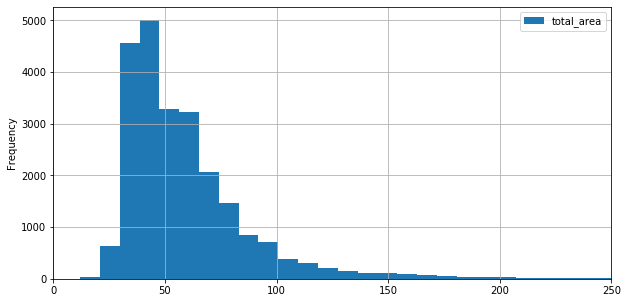

In [428]:
data['total_area'].plot(kind = 'hist', bins = 100,figsize = (10,5), legend = True, grid = True, xlim = (0,250));

In [429]:
data['total_area'].describe()

count   23650.00
mean       60.33
std        35.66
min        12.00
25%        40.00
50%        52.00
75%        69.70
max       900.00
Name: total_area, dtype: float64

Изучили на какую площадь в м2 больше всего объявлений

In [430]:
data['last_price_mln'] = data['last_price'] / 1000000

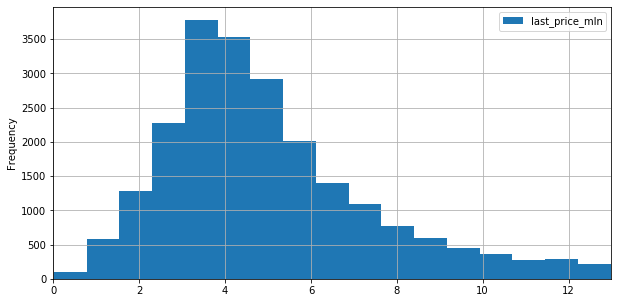

In [431]:
data['last_price_mln'].plot(kind = 'hist', bins = 1000,figsize = (10,5), legend = True, grid = True, xlim = (0, 13));

In [432]:
data['last_price_mln'].describe()

count   23650.00
mean        6.54
std        10.90
min         0.01
25%         3.40
50%         4.65
75%         6.80
max       763.00
Name: last_price_mln, dtype: float64

Изучили какая последняя цена большинства объявлений в миллионах.

In [433]:
data['price_per_meter_k'] = data['price_per_meter'] / 1000

In [434]:
data[data['price_per_meter_k'] < 12][['total_area', 'locality_name', 'price_per_meter_k']]

,total_area,locality_name,price_per_meter_k
4405,52.00,Сланцы,9.62
5698,42.00,городской поселок Будогощь,10.71
7962,46.20,Луга,11.90
8793,109.00,Санкт-Петербург,0.11
9471,78.00,Гатчина,10.90
9581,43.40,деревня Старополье,10.37
10595,63.00,Сланцы,11.59
11351,54.00,Сланцы,10.19
14911,54.00,поселок станции Свирь,7.96
15969,54.00,Сланцы,10.93


In [436]:
data[data['price_per_meter_k'] > 400]

,total_images,last_price,locality_name,total_area,living_area,kitchen_area,floors_total,number_floor,count_rooms,ceiling_height,...,days_exposition,day_of_week_exposition,month_exposition,year_exposition,price_per_meter,floor_status,total_living_area_ratio,total_kitchen_area_ratio,last_price_mln,price_per_meter_k
3,0,64900000.00,Санкт-Петербург,159.00,nan,nan,14.00,9,3,nan,...,424.00,пятница,7,2015,408176.10,другой,nan,nan,64.90,408.18
492,18,95000000.00,Санкт-Петербург,216.00,86.00,77.00,5.00,4,4,3.00,...,14.00,вторник,12,2017,439814.81,другой,0.40,0.36,95.00,439.81
793,20,135000000.00,Санкт-Петербург,310.00,250.00,50.00,5.00,2,4,3.30,...,342.00,вторник,5,2018,435483.87,другой,0.81,0.16,135.00,435.48
1026,20,155000000.00,Санкт-Петербург,310.00,190.00,63.00,3.00,3,5,5.30,...,nan,пятница,10,2018,500000.00,последний,0.61,0.20,155.00,500.00
1188,20,118000000.00,Санкт-Петербург,290.60,188.70,22.00,6.00,3,6,3.82,...,316.00,пятница,6,2018,406056.43,другой,0.65,0.08,118.00,406.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22229,16,148000000.00,Санкт-Петербург,256.00,179.00,36.00,6.00,5,5,nan,...,233.00,среда,3,2016,578125.00,другой,0.70,0.14,148.00,578.12
22709,20,59000000.00,Санкт-Петербург,127.50,85.00,13.00,12.00,8,4,3.00,...,635.00,среда,12,2016,462745.10,другой,0.67,0.10,59.00,462.75
22831,18,289238400.00,Санкт-Петербург,187.50,63.70,30.20,6.00,6,2,3.37,...,nan,вторник,3,2019,1542604.80,последний,0.34,0.16,289.24,1542.60
22869,0,15000000.00,Санкт-Петербург,25.00,14.00,11.00,5.00,5,1,100.00,...,19.00,среда,7,2018,600000.00,последний,0.56,0.44,15.00,600.00


In [437]:
display(data.query('price_per_meter_k > 400')['price_per_meter_k'].count())
data = data.query('price_per_meter_k < 400')

78

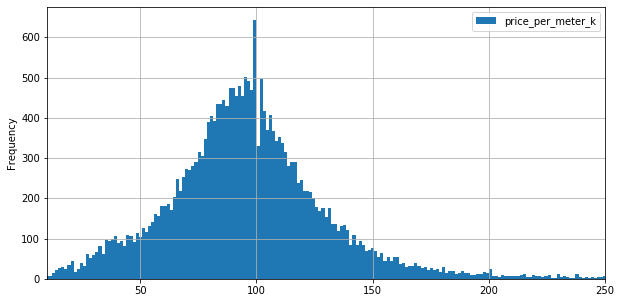

In [438]:
data['price_per_meter_k'].plot(kind = 'hist', bins = 300,figsize = (10,5), legend = True, grid = True, 
xlim = (10, 250));

In [439]:
data['price_per_meter'].describe()

count    23571.00
mean     97792.86
std      38748.94
min        111.83
25%      76522.72
50%      94890.51
75%     113974.59
max     399804.88
Name: price_per_meter, dtype: float64

Выясним среднюю стоимость за квардатный метр

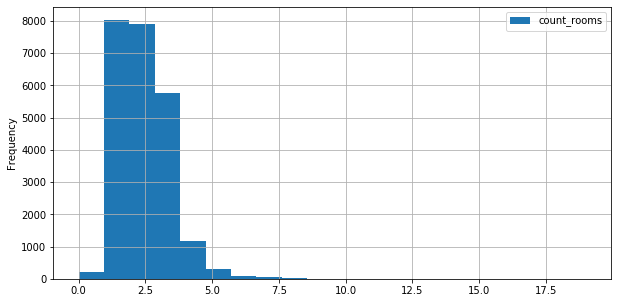

In [440]:
data['count_rooms'].plot(kind = 'hist', bins = 20,figsize = (10,5), legend = True, grid = True);

In [441]:
data['count_rooms'].describe()

count   23571.00
mean        2.06
std         1.07
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: count_rooms, dtype: float64

Изучим на скольки комантные квартиры больше всего приходится объявлений

In [442]:
display(data[data['ceiling_height'] > 4]['ceiling_height'].count())
display(data[data['ceiling_height'] < 2.2]['ceiling_height'].count())
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 4, 2.77)
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] > 2.2, 2.77)

69

14

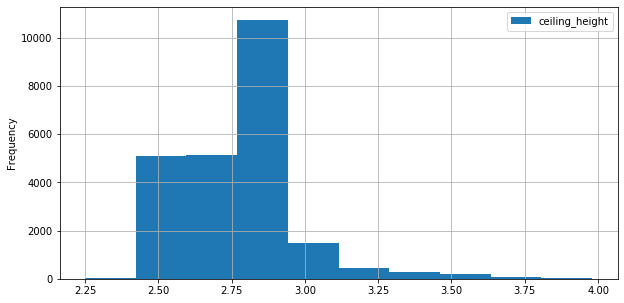

In [443]:
data['ceiling_height'].plot(kind = 'hist', bins = 10,figsize = (10,5), legend = True, grid = True);

In [444]:
data['ceiling_height'].describe()

count   23571.00
mean        2.74
std         0.19
min         2.25
25%         2.60
50%         2.77
75%         2.77
max         3.98
Name: ceiling_height, dtype: float64

И посмотрим на среднюю высоту потолков

* Больше всего объявлений размещены на недвижимость площадью от 40 до 70 м2. 
* Последняя цена большинства объявлений от 3,4 до 6,8 млн. руб. 
* Средняя стоимость квадратного метра 97тыс.руб., большинство значений расположены в интервале от 76 до 113 тысяч рублей.  * Больше всего объявлений на однокомнатные и двухкомнатные квартиры, ненамного меньше объявлений на трехкомнатные квартиры (~20%). 
* 2,7м - средняя высота потолков.

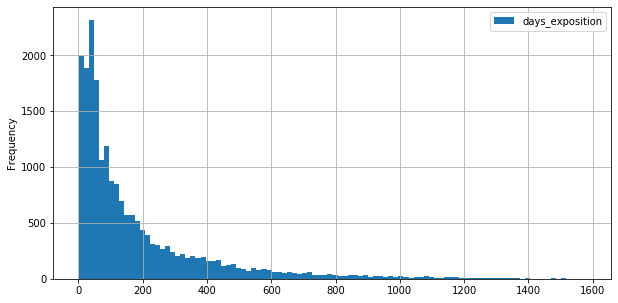

In [445]:
data['days_exposition'].plot(kind = 'hist', bins = 100,figsize = (10,5), legend = True, grid = True);

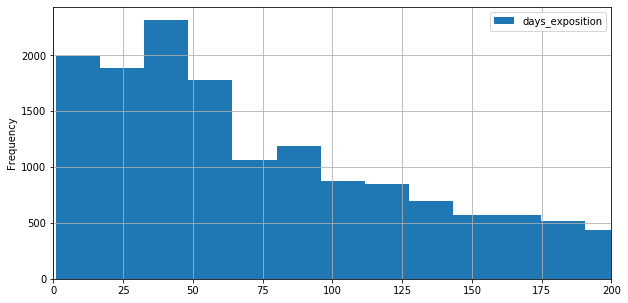

In [446]:
data['days_exposition'].plot(kind = 'hist', bins = 100,figsize = (10,5), legend = True, grid = True, xlim = (0, 200));

<div class="alert alert-success"; style="border-left: 7px solid green">
<font size="4"><b>Комментарий ревьюера 🚀</b></font>
    <br />
    <font size="3", color = "black">
    <br /> Тут тоже отлично построено распределение
    </font>

</div>

In [447]:
data['days_exposition'].describe()

count   20407.00
mean      180.38
std       219.55
min         1.00
25%        45.00
50%        95.00
75%       230.50
max      1580.00
Name: days_exposition, dtype: float64

Среднее значение: 180 дней, медиана: 95 дней, половина всех объявлений размещены в интервале от 45 до 230 дней. Очень быстрой продажей можно считать продажу в течении 45 дней, необычно долгой свыше 230 дней.

In [448]:
# Напишем функцию для удаления большинства выборосов и построим по ним графики

def delete_outliers(data, column,graphic=0,x=10,y=10):
    q1 = data[column].quantile(0.25)                 
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    filter_data = (data[column] >= (q1 - 1.5*iqr)) & (data[column] <= (q3 + 1.5*iqr))
    if graphic == 1:
        return data.loc[filter_data].boxplot([column], figsize=(x,y))
    else:
        return data.loc[filter_data]

(0, 150)

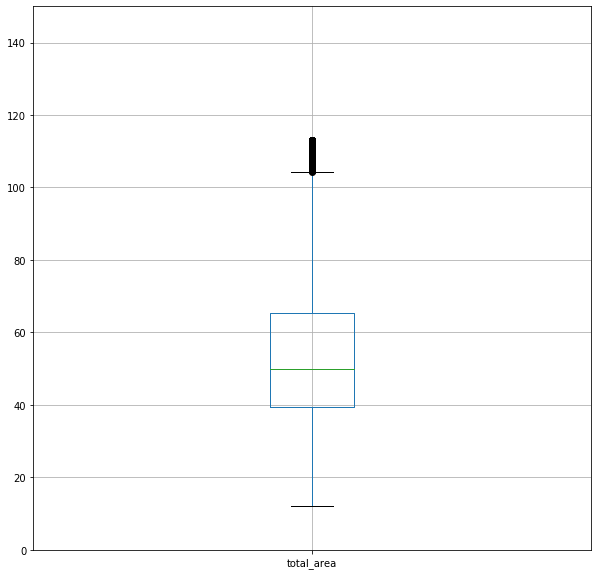

In [449]:
delete_outliers(data,'total_area',1,10,10).set_ylim(0,150)

In [450]:
data['total_area'].describe()

count   23571.00
mean       59.88
std        34.01
min        12.00
25%        40.00
50%        52.00
75%        69.29
max       631.20
Name: total_area, dtype: float64

(0, 10000000)

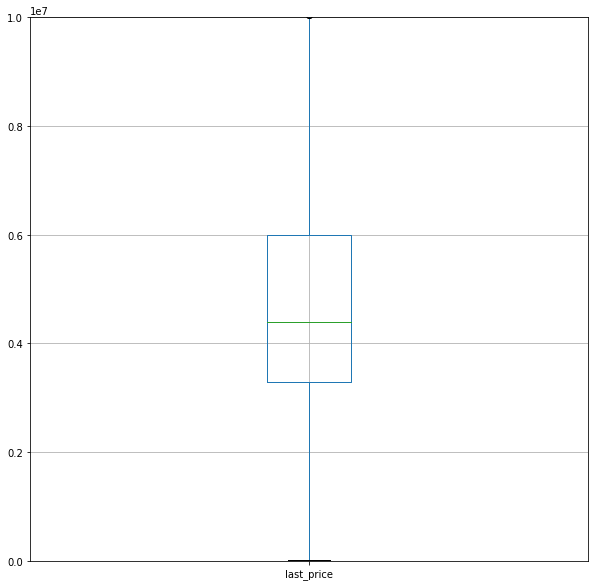

In [451]:
delete_outliers(data,'last_price',1,10,10).set_ylim(0, 10000000)

In [452]:
data['last_price'].describe()

count       23571.00
mean      6172890.82
std       6214440.25
min         12190.00
25%       3400000.00
50%       4600000.00
75%       6750000.00
max     150000000.00
Name: last_price, dtype: float64

(0, 200)

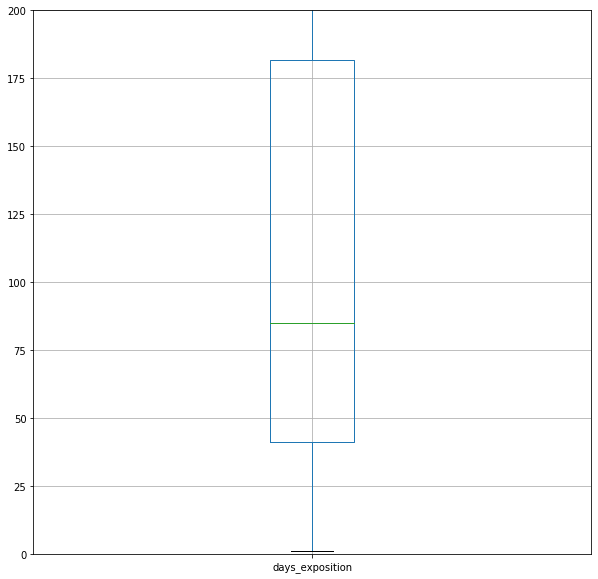

In [453]:
delete_outliers(data,'days_exposition',1,10,10).set_ylim(0, 200)

In [454]:
data['days_exposition'].describe()

count   20407.00
mean      180.38
std       219.55
min         1.00
25%        45.00
50%        95.00
75%       230.50
max      1580.00
Name: days_exposition, dtype: float64

(0, 200000)

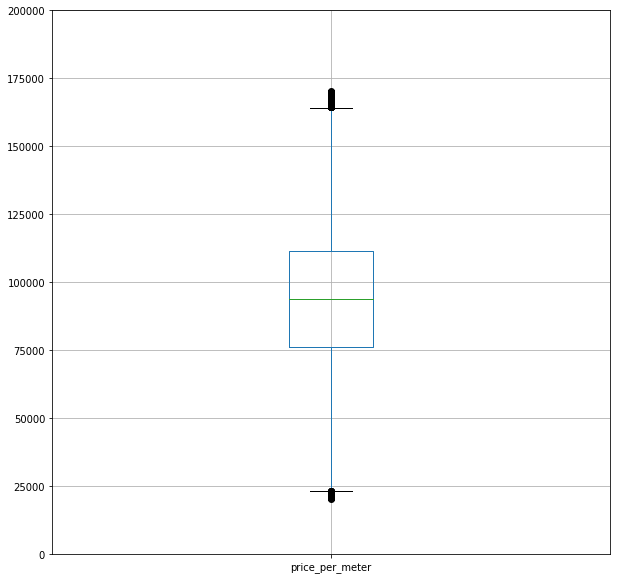

In [455]:
delete_outliers(data,'price_per_meter',1,10,10).set_ylim(0, 200000)

In [456]:
data['price_per_meter'].describe()

count    23571.00
mean     97792.86
std      38748.94
min        111.83
25%      76522.72
50%      94890.51
75%     113974.59
max     399804.88
Name: price_per_meter, dtype: float64

Было исключено объявление со стоимостью 12190руб. и исключены объявления с ценой свыше 150млн. и стоимостью свыше 400 тысяч руб. за квадратный метр, так как они сильно влияли на среднюю цену. Также в тех объявлениях, где кол-во комнат было 0, значение заменено на 1. Объявления с высотой потолков меньше 2,2м и свыше 4м, были заменены на среднее значение (2,77м).

In [457]:
data.columns

Index(['total_images', 'last_price', 'locality_name', 'total_area',
       'living_area', 'kitchen_area', 'floors_total', 'number_floor',
       'count_rooms', 'ceiling_height', 'count_balcony', 'is_apartment',
       'is_studio', 'is_open_plan', 'airports_nearest', 'city_centers_nearset',
       'parks_around3km', 'parks_nearest', 'ponds_around3km', 'ponds_nearest',
       'first_day_exposition', 'days_exposition', 'day_of_week_exposition',
       'month_exposition', 'year_exposition', 'price_per_meter',
       'floor_status', 'total_living_area_ratio', 'total_kitchen_area_ratio',
       'last_price_mln', 'price_per_meter_k'],
      dtype='object')

In [458]:
display(data[data['total_living_area_ratio'] < data['total_kitchen_area_ratio']]['total_living_area_ratio']
.count())
display(data[data['total_living_area_ratio'] < data['total_kitchen_area_ratio']][['total_area', 
'living_area', 'kitchen_area', 'total_living_area_ratio', 'total_kitchen_area_ratio']].head(5))

def area_correction(row):
    kitchen = row['kitchen_area']
    living = row['living_area']
    if living < kitchen:
        return kitchen

data['living_area'] = data.apply(area_correction, axis = 1)
data['total_living_area_ratio'] = data['living_area'] / data['total_area']

display(data[data['total_living_area_ratio'] < data['total_kitchen_area_ratio']]['total_living_area_ratio']
.count())
display(data.loc[4:6][['total_area', 'living_area', 'kitchen_area', 
                       'total_living_area_ratio', 'total_kitchen_area_ratio']])

349

,total_area,living_area,kitchen_area,total_living_area_ratio,total_kitchen_area_ratio
4,100.00,32.00,41.00,0.32,0.41
6,37.30,10.60,14.40,0.28,0.39
51,161.00,38.00,50.00,0.24,0.31
53,39.10,15.40,15.50,0.39,0.40
101,37.00,12.00,13.00,0.32,0.35


0

,total_area,living_area,kitchen_area,total_living_area_ratio,total_kitchen_area_ratio
4,100.00,41.00,41.00,0.41,0.41
5,30.40,nan,9.10,nan,0.30
6,37.30,14.40,14.40,0.39,0.39


In [459]:
data['total_living_area_ratio'].describe()

count   349.00
mean      0.43
std       0.07
min       0.13
25%       0.38
50%       0.42
75%       0.47
max       0.74
Name: total_living_area_ratio, dtype: float64

In [460]:
data[data['total_living_area_ratio'] < 0.25]

,total_images,last_price,locality_name,total_area,living_area,kitchen_area,floors_total,number_floor,count_rooms,ceiling_height,...,days_exposition,day_of_week_exposition,month_exposition,year_exposition,price_per_meter,floor_status,total_living_area_ratio,total_kitchen_area_ratio,last_price_mln,price_per_meter_k
13915,20,6350000.00,Санкт-Петербург,52.00,9.00,9.00,6.00,2,2,3.00,...,91.00,вторник,2,2018,122115.38,другой,0.17,0.17,6.35,122.12
21943,15,6100000.00,Санкт-Петербург,77.60,9.80,9.80,9.00,1,4,2.50,...,33.00,четверг,2,2019,78608.25,первый,0.13,0.13,6.10,78.61


In [461]:
data[data['living_area'] < 10]

,total_images,last_price,locality_name,total_area,living_area,kitchen_area,floors_total,number_floor,count_rooms,ceiling_height,...,days_exposition,day_of_week_exposition,month_exposition,year_exposition,price_per_meter,floor_status,total_living_area_ratio,total_kitchen_area_ratio,last_price_mln,price_per_meter_k
13915,20,6350000.00,Санкт-Петербург,52.00,9.00,9.00,6.00,2,2,3.00,...,91.00,вторник,2,2018,122115.38,другой,0.17,0.17,6.35,122.12
21943,15,6100000.00,Санкт-Петербург,77.60,9.80,9.80,9.00,1,4,2.50,...,33.00,четверг,2,2019,78608.25,первый,0.13,0.13,6.10,78.61


In [462]:
data['airports_nearest'].describe()

count   18040.00
mean    28812.76
std     12659.59
min         0.00
25%     18545.00
50%     26766.00
75%     37347.25
max     84869.00
Name: airports_nearest, dtype: float64

In [463]:
display(data.query('airports_nearest == 0')['airports_nearest'].count())
data = data.query('airports_nearest > 0')

1

In [464]:
data['airports_nearest'].describe()

count   18039.00
mean    28814.36
std     12658.12
min      6450.00
25%     18548.00
50%     26766.00
75%     37347.50
max     84869.00
Name: airports_nearest, dtype: float64

В 354 объявлениях было обнаружено, что площадь кухни была больше жилой площади, в этих объявлениях значения жилой площади были приравнены к значениям площади кухни. Также было найдено одно объявление, где расстояние до аэропорта было равно 0, оно было исключено.

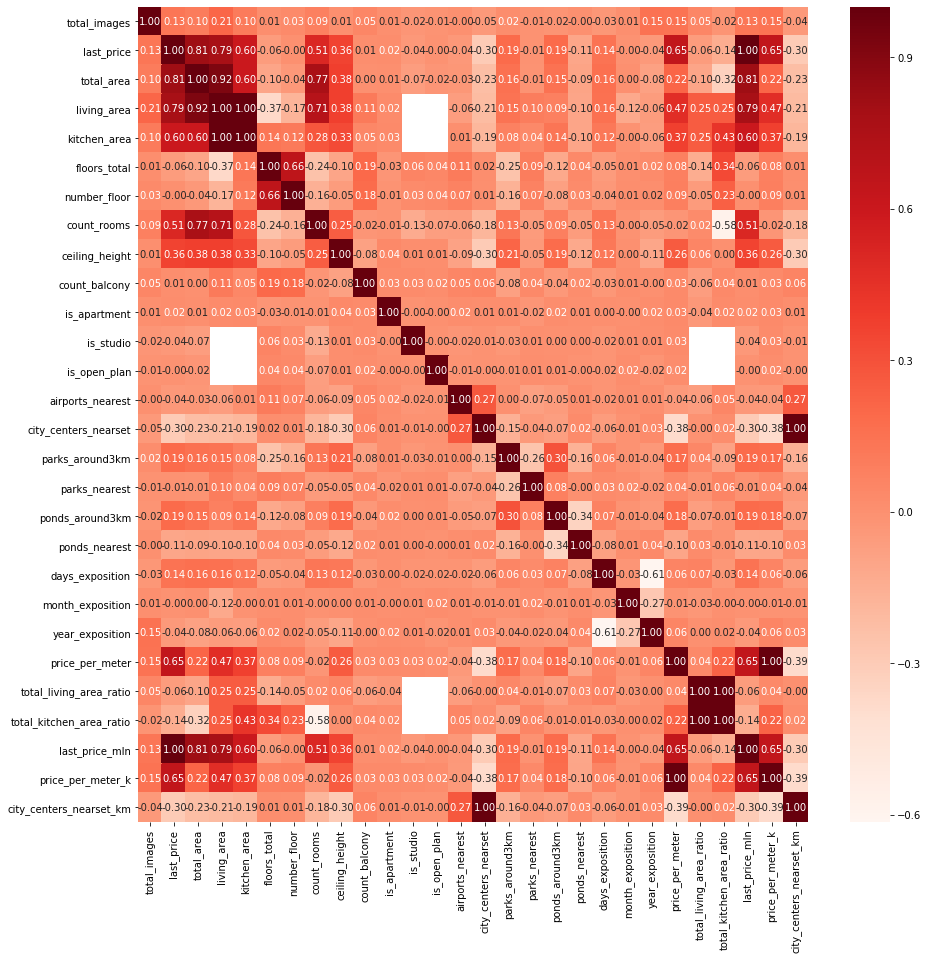

In [495]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, cmap="Reds", fmt='.2f')

In [466]:
#data_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, total_images to price_per_meter_k
Data columns (total 27 columns):
total_images                27 non-null float64
last_price                  27 non-null float64
total_area                  27 non-null float64
living_area                 25 non-null float64
kitchen_area                25 non-null float64
floors_total                27 non-null float64
number_floor                27 non-null float64
count_rooms                 27 non-null float64
ceiling_height              27 non-null float64
count_balcony               27 non-null float64
is_apartment                27 non-null float64
is_studio                   23 non-null float64
is_open_plan                23 non-null float64
airports_nearest            27 non-null float64
city_centers_nearset        27 non-null float64
parks_around3km             27 non-null float64
parks_nearest               27 non-null float64
ponds_around3km             27 non-null float64
ponds_neares

In [468]:
data_corr['last_price'].sort_values()

city_centers_nearset       -0.30
total_kitchen_area_ratio   -0.14
ponds_nearest              -0.11
total_living_area_ratio    -0.06
floors_total               -0.06
year_exposition            -0.04
is_studio                  -0.04
airports_nearest           -0.04
parks_nearest              -0.01
month_exposition           -0.00
is_open_plan               -0.00
number_floor               -0.00
count_balcony               0.01
is_apartment                0.02
total_images                0.13
days_exposition             0.14
ponds_around3km             0.19
parks_around3km             0.19
ceiling_height              0.36
count_rooms                 0.51
kitchen_area                0.60
price_per_meter_k           0.65
price_per_meter             0.65
living_area                 0.79
total_area                  0.81
last_price                  1.00
last_price_mln              1.00
Name: last_price, dtype: float64

In [469]:
grouped_by_floor_type = data.pivot_table(index = 'floor_status', values = ['last_price','price_per_meter'], 
aggfunc = ['mean', 'count']).astype('int64')
grouped_by_floor_type.columns = ['Last price, mean','Price per meter, mean','Ads, count','Ads, %']
grouped_by_floor_type['Ads, %'] = grouped_by_floor_type['Ads, count'] / grouped_by_floor_type['Ads, count'].sum()*100
grouped_by_floor_type

,"Last price, mean","Price per meter, mean","Ads, count","Ads, %"
floor_status,,,,
другой,7153362,110748,13747,76.21
первый,5739012,95920,1989,11.03
последний,7867904,106539,2303,12.77


In [470]:
grouped_by_weekday = data.pivot_table(index = 'day_of_week_exposition', values = ['last_price','price_per_meter'], 
aggfunc = ['mean', 'count']).astype('int64')
grouped_by_weekday.columns = ['Last price, mean','Price per meter, mean','Ads, count','Ads, %']
grouped_by_weekday['Ads, %'] = grouped_by_weekday['Ads, count'] / grouped_by_weekday['Ads, count'].sum()*100
grouped_by_weekday

,"Last price, mean","Price per meter, mean","Ads, count","Ads, %"
day_of_week_exposition,,,,
воскресенье,6916049,107754,1278,7.08
вторник,7009499,108646,3216,17.83
понедельник,7110019,109185,2743,15.21
пятница,6975070,108270,3069,17.01
среда,7106639,108484,3031,16.80
суббота,7107012,108598,1435,7.95
четверг,7298019,108677,3267,18.11


In [471]:
grouped_by_month = data.pivot_table(index = 'month_exposition', values = ['last_price','price_per_meter'], 
aggfunc = ['mean', 'count']).astype('int64')
grouped_by_month.columns = ['Last price, mean','Price per meter, mean','Ads, count','Ads, %']
grouped_by_month['Ads, %'] = grouped_by_month['Ads, count'] / grouped_by_month['Ads, count'].sum()*100
grouped_by_month

,"Last price, mean","Price per meter, mean","Ads, count","Ads, %"
month_exposition,,,,
1,7520593,111027,1115,6.18
2,7096384,108743,2014,11.16
3,7082450,109404,1922,10.65
4,7007064,109231,1824,10.11
5,7006212,106542,989,5.48
6,6904507,107357,1344,7.45
7,7167357,107752,1304,7.23
8,6893187,109192,1355,7.51
9,7208093,108630,1523,8.44


In [472]:
grouped_by_year = data.pivot_table(index = 'year_exposition', values = ['last_price','price_per_meter'], 
aggfunc = ['mean', 'count']).astype('int64')
grouped_by_year.columns = ['Last price, mean','Price per meter, mean','Ads, count','Ads, %']
grouped_by_year['Ads, %'] = grouped_by_year['Ads, count'] / grouped_by_year['Ads, count'].sum()*100
grouped_by_year

,"Last price, mean","Price per meter, mean","Ads, count","Ads, %"
year_exposition,,,,
2014,13452030,134400,113,0.63
2015,8354446,108105,946,5.24
2016,7285719,106602,2159,11.97
2017,6928833,105312,6394,35.45
2018,6754755,109236,6233,34.55
2019,7435437,117024,2194,12.16


Наибольшая корреляция, это корреляция цены с площадью и жилой площадью (0,81 и 0,79 соответственно), что вполне ожидаемо. Корреляция цены с количеством комнат составила 0,51, показатель не очень высокий, думаю это связано с тем, что кол-во комнат в объявлении могут быть одинаковыми, но жилые площади сильно различаться. Корреляция между ценой и удалённостью от центра отрицательна и составила -0,3, не сильная, но все равно можно сказать, что чаще жилье стоит дешевле, чем дальше оно от центра. Квартиры на первом этаже в среднем стоят на 11% дешевле, чем средняя стоимость по всей базе и на 22% дешевле, чем остальные квартиры. Эта зависимость сохраняется и в стоимости квадратного метра: на 3% дешевле среднего по всей базе и на 12% всех остальных. Квартиры на последнем этаже на 22% дороже среднего показателя, но это связано с их площадью, так как цена квадратного метра очень близка к остальным вариантам (кроме первых этажей). По дню недели размещения объявления, несильно выбиваются только значения четверга - средняя стоимость объявлений на 4% выше, чем в другие дни. Цена объявлений размещенных в декабре и январе примерно на 5% дороже, чем в другие месяца. В 2014 году была самая высокая средняя стоимость объявлений (13,5млн), но и кол-во объявлений очень мало (0,6%) от всей базы, поэтому нельзя сделать четких выводов о том, что цена на недвижимость в 2015 упала по сравнению с 2014. В 2019 году средняя стоимость жилья выросла на 10% и средняя стоимость квадратного метра выросла на 7% по сравнению с 2018 годом.

In [497]:
grouped_by_locality = data.pivot_table(index = 'locality_name', values = 'price_per_meter', 
aggfunc = ['count', 'mean']).astype('int64')
grouped_by_locality.columns = ['Ads, count', 'Price per meter, mean']
grouped_by_locality['Ads, %'] = grouped_by_locality['Ads, count'] / grouped_by_locality['Ads, count'].sum()*100
grouped_by_locality_top10 = grouped_by_locality.sort_values(by = 'Ads, count').tail(10)
grouped_by_locality_top10.sort_values(by = 'Price per meter, mean')

,"Ads, count","Price per meter, mean","Ads, %"
locality_name,,,
Красное Село,176,72009,0.98
Ломоносов,132,72609,0.73
Колпино,337,75402,1.87
поселок Шушары,436,78474,2.42
Кронштадт,95,79380,0.53
Петергоф,201,84757,1.11
поселок Парголово,327,90175,1.81
Сестрорецк,183,101757,1.01
Пушкин,369,103125,2.05


Санкт-Петербург - населенный пункт с самой высокой стоимостью жилья (112тысяч руб. за квадратный метр), а Красное Село с самой низкой стоимостью (72тысячи руб. за квадратный метр).

In [474]:
data.columns

Index(['total_images', 'last_price', 'locality_name', 'total_area',
       'living_area', 'kitchen_area', 'floors_total', 'number_floor',
       'count_rooms', 'ceiling_height', 'count_balcony', 'is_apartment',
       'is_studio', 'is_open_plan', 'airports_nearest', 'city_centers_nearset',
       'parks_around3km', 'parks_nearest', 'ponds_around3km', 'ponds_nearest',
       'first_day_exposition', 'days_exposition', 'day_of_week_exposition',
       'month_exposition', 'year_exposition', 'price_per_meter',
       'floor_status', 'total_living_area_ratio', 'total_kitchen_area_ratio',
       'last_price_mln', 'price_per_meter_k'],
      dtype='object')

In [475]:
data['city_centers_nearset_km'] = round(data['city_centers_nearset'] / 1000)

def center_distance_grouped(row):
    center_distance = row['city_centers_nearset_km']
    if center_distance <= 5:
        return ('0 - 5')
    elif 5 < center_distance <= 10:
        return ('5 - 10')
    elif 10 < center_distance <= 13:
        return ('10 - 13')
    elif 13 < center_distance <= 15:
        return ('13 - 15')
    elif 15 < center_distance <= 20:
        return ('15 - 20')
    elif center_distance > 20:
        return ('20+')
    else:
        return 'Unknown'
    
data['city_centers_nearset_grouped'] = data.apply(center_distance_grouped, axis = 1)
data['city_centers_nearset_grouped'].unique()

array(['15 - 20', '13 - 15', '5 - 10', '10 - 13', '20+', '0 - 5',
       'Unknown'], dtype=object)

In [476]:
data['city_centers_nearset_km'].head(5)

0   16.00
1   19.00
2   14.00
4    8.00
6   19.00
Name: city_centers_nearset_km, dtype: float64

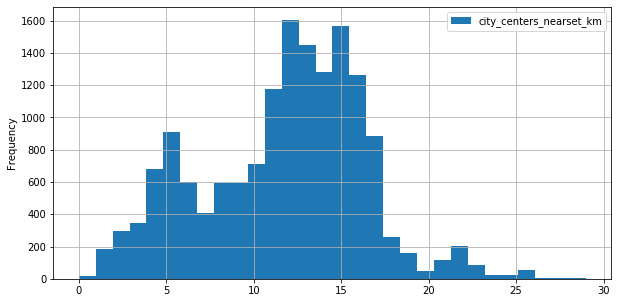

In [477]:
data_sp = data[data['locality_name'] == 'Санкт-Петербург']
data_sp['city_centers_nearset_km'].plot(kind = 'hist', bins = 30,figsize = (10,5), legend = True, grid = True)

In [478]:
grouped_by_center_dist = data_sp.pivot_table(index = 'city_centers_nearset_grouped', values = 'price_per_meter', 
aggfunc = ['mean', 'count'])
grouped_by_center_dist.columns = ['Price per meter, mean','Ads, count']
grouped_by_center_dist['Ads, %'] = grouped_by_center_dist['Ads, count'] / grouped_by_center_dist['Ads, count'].sum()*100
grouped_by_center_dist.sort_values(by = 'Price per meter, mean', ascending = False)

,"Price per meter, mean","Ads, count","Ads, %"
city_centers_nearset_grouped,,,
0 - 5,132459.51,2440,15.68
5 - 10,125632.19,2907,18.68
10 - 13,107924.32,4228,27.17
13 - 15,104241.14,2847,18.30
15 - 20,98726.72,2615,16.81
20+,91269.50,522,3.35


In [479]:
data_sp_corr = data_sp.corr()
data_sp_corr['price_per_meter'].sort_values()

city_centers_nearset_km    -0.36
city_centers_nearset       -0.36
ponds_nearest              -0.11
count_rooms                -0.03
month_exposition           -0.02
airports_nearest           -0.01
is_open_plan                0.02
is_studio                   0.02
is_apartment                0.03
total_living_area_ratio     0.03
count_balcony               0.03
parks_nearest               0.03
year_exposition             0.05
floors_total                0.06
days_exposition             0.07
number_floor                0.08
total_images                0.14
parks_around3km             0.17
ponds_around3km             0.20
total_area                  0.22
total_kitchen_area_ratio    0.22
ceiling_height              0.25
kitchen_area                0.38
living_area                 0.49
last_price                  0.65
last_price_mln              0.65
price_per_meter             1.00
price_per_meter_k           1.00
Name: price_per_meter, dtype: float64

In [480]:
data_sp_corr_grouped = data_sp_corr.loc[
['price_per_meter', 'last_price', 'total_area', 'living_area','ceiling_height', 'parks_around3000', 'ponds_around3000',
 'city_centers_nearset_km'],
['price_per_meter', 'last_price', 'total_area', 'living_area','ceiling_height', 'parks_around3000', 'ponds_around3000',
 'city_centers_nearset_km']]
display(data_sp_corr_grouped)
#CorrMtx(data_sp_corr_grouped, dropDuplicates = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,price_per_meter,last_price,total_area,living_area,ceiling_height,parks_around3000,ponds_around3000,city_centers_nearset_km
price_per_meter,1.00,0.65,0.22,0.49,0.25,nan,nan,-0.36
last_price,0.65,1.00,0.82,0.81,0.36,nan,nan,-0.37
total_area,0.22,0.82,1.00,0.92,0.39,nan,nan,-0.34
living_area,0.49,0.81,0.92,1.00,0.38,nan,nan,-0.31
ceiling_height,0.25,0.36,0.39,0.38,1.00,nan,nan,-0.44
parks_around3000,nan,nan,nan,nan,nan,nan,nan,nan
ponds_around3000,nan,nan,nan,nan,nan,nan,nan,nan
city_centers_nearset_km,-0.36,-0.37,-0.34,-0.31,-0.44,nan,nan,1.00


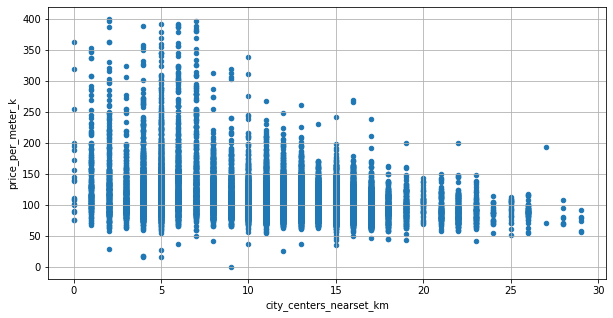

In [481]:
data_sp.plot(x = 'city_centers_nearset_km', y = 'price_per_meter_k',  
kind = 'scatter', figsize = (10,5), legend = True, grid = True);

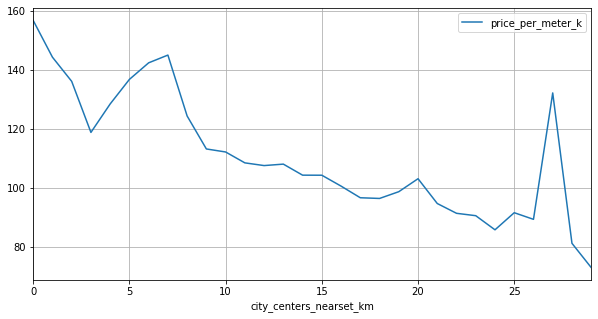

In [482]:
data_sp_km_price = data_sp.pivot_table(index = 'city_centers_nearset_km', values = 'price_per_meter_k')
data_sp_km_price.plot(kind = 'line', figsize = (10,5), legend = True, grid = True);

Сильный перелом графика находится где-то на уровне 7км. Все объявления, входящие в радиус 7км от центра в последующем буду считать центром.

In [483]:
data_sp_center = data_sp[data_sp['city_centers_nearset_km'] <= 7]
data_sp_center

,total_images,last_price,locality_name,total_area,living_area,kitchen_area,floors_total,number_floor,count_rooms,ceiling_height,...,month_exposition,year_exposition,price_per_meter,floor_status,total_living_area_ratio,total_kitchen_area_ratio,last_price_mln,price_per_meter_k,city_centers_nearset_km,city_centers_nearset_grouped
24,8,6500000.00,Санкт-Петербург,97.20,nan,19.60,3.00,1,2,2.77,...,10,2015,66872.43,первый,nan,0.20,6.50,66.87,2.00,0 - 5
35,6,15500000.00,Санкт-Петербург,149.00,nan,17.00,5.00,4,5,2.77,...,6,2017,104026.85,другой,nan,0.11,15.50,104.03,4.00,0 - 5
51,7,45000000.00,Санкт-Петербург,161.00,50.00,50.00,8.00,4,3,3.20,...,10,2017,279503.11,другой,0.31,0.31,45.00,279.50,7.00,5 - 10
52,20,11795000.00,Санкт-Петербург,136.00,nan,11.00,2.00,2,6,3.00,...,9,2017,86727.94,последний,nan,0.08,11.79,86.73,7.00,5 - 10
61,18,7990000.00,Санкт-Петербург,74.00,nan,20.00,4.00,4,2,2.77,...,8,2017,107972.97,последний,nan,0.27,7.99,107.97,4.00,0 - 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23665,11,4250000.00,Санкт-Петербург,47.00,nan,14.60,6.00,1,1,2.77,...,5,2016,90425.53,первый,nan,0.31,4.25,90.43,5.00,0 - 5
23681,13,5250000.00,Санкт-Петербург,43.00,nan,6.00,5.00,2,2,2.50,...,5,2018,122093.02,другой,nan,0.14,5.25,122.09,7.00,5 - 10
23690,3,5500000.00,Санкт-Петербург,52.00,nan,6.00,5.00,2,2,2.77,...,7,2018,105769.23,другой,nan,0.12,5.50,105.77,6.00,5 - 10
23691,11,9470000.00,Санкт-Петербург,72.90,nan,10.60,25.00,7,2,2.75,...,10,2016,129903.98,другой,nan,0.15,9.47,129.90,4.00,0 - 5


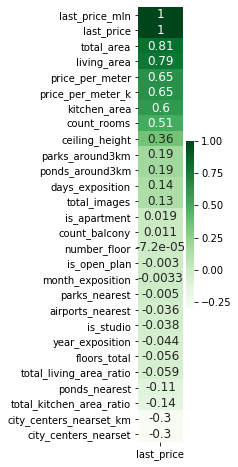

In [499]:
plt.figure(figsize=(1,8))
sns.heatmap(data.corr()[['last_price']].sort_values(by='last_price', ascending=False), cmap="Greens", 
            annot=True, annot_kws={'size':12})

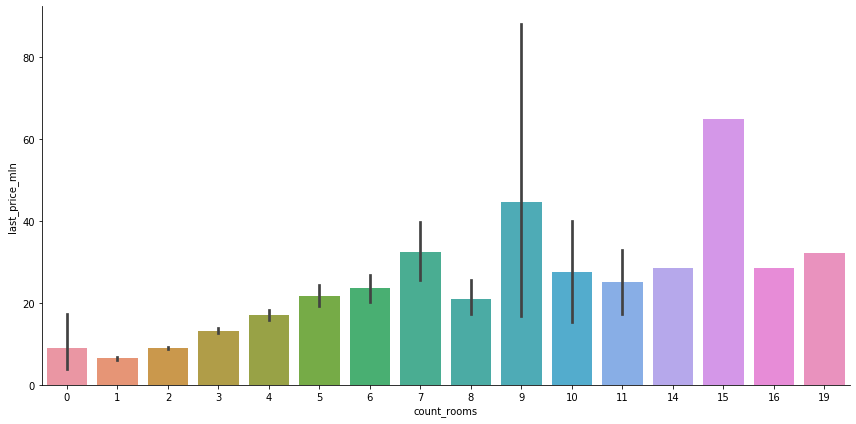

In [507]:
sns.catplot(data = data_sp_center, x = 'count_rooms', y = 'last_price_mln', 
kind = 'bar', height = 6, aspect = 2);

In [486]:
display(data_sp_center.pivot_table(index = 'floor_status', values = 'last_price_mln'))
data_sp.pivot_table(index = 'floor_status', values = 'last_price_mln')

,last_price_mln
floor_status,
другой,13.05
первый,8.84
последний,13.59


,last_price_mln
floor_status,
другой,7.50
первый,6.04
последний,8.51


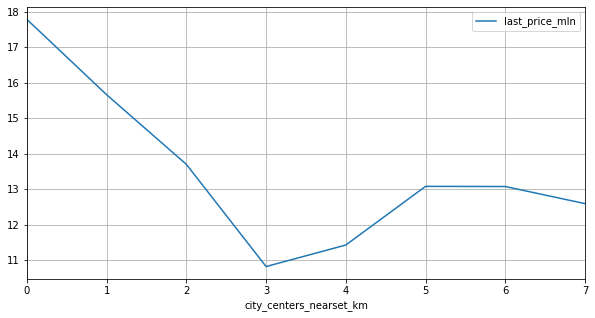

In [487]:
data_sp_km_center_price = data_sp_center.pivot_table(index = 'city_centers_nearset_km', values = 'last_price_mln')
data_sp_km_center_price.plot(kind = 'line', figsize = (10,5), legend = True, grid = True);

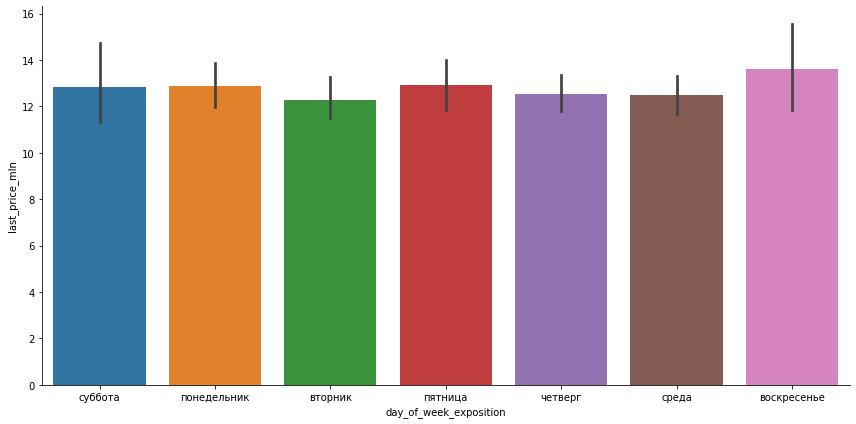

In [508]:
sns.catplot(data = data_sp_center, x = 'day_of_week_exposition', y = 'last_price_mln', 
kind = 'bar', height = 6, aspect = 2);

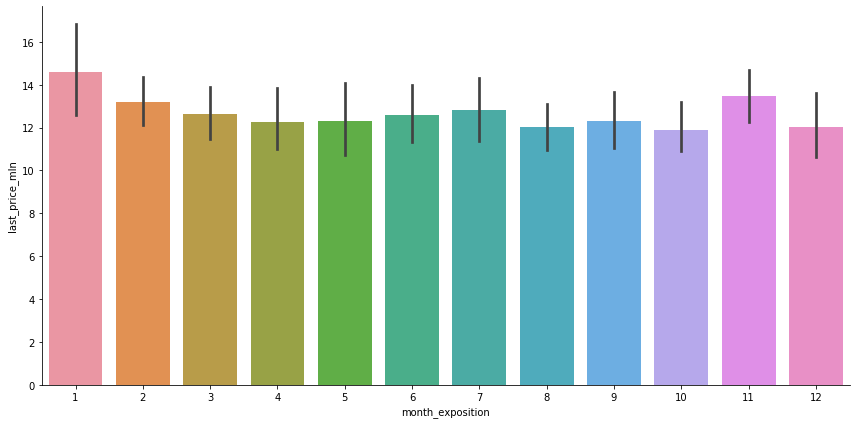

In [509]:
sns.catplot(data = data_sp_center, x = 'month_exposition', y = 'last_price_mln', 
kind = 'bar', height = 6, aspect = 2);

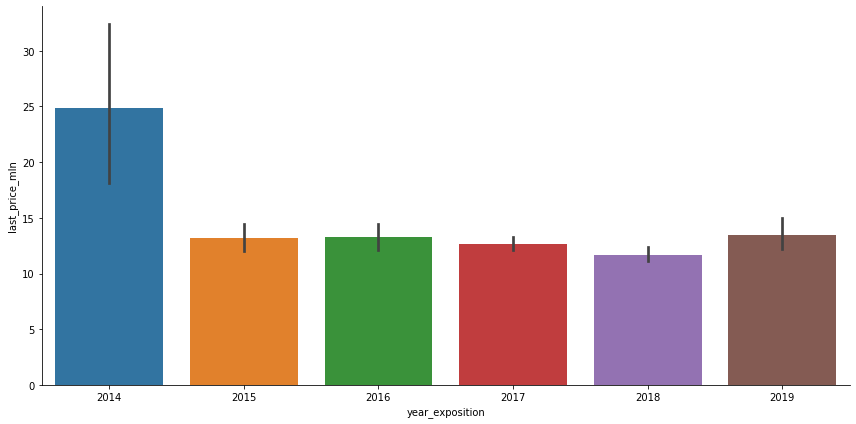

In [511]:
sns.catplot(data = data_sp_center, x = 'year_exposition', y = 'last_price_mln', 
kind = 'bar', height = 6, aspect = 2);

In [491]:
r1 = data[['last_price_mln', 'price_per_meter_k', 'total_area', 'count_rooms', 'ceiling_height', 'city_centers_nearset_km', 
    'parks_around3km', 'ponds_around3km']].describe()
r2 = data_sp[['last_price_mln', 'price_per_meter_k', 'total_area', 'count_rooms', 'ceiling_height', 'city_centers_nearset_km', 
    'parks_around3km', 'ponds_around3km']].describe()
r3 = data_sp_center[['last_price_mln', 'price_per_meter_k', 'total_area', 'count_rooms', 'ceiling_height', 
    'city_centers_nearset_km', 'parks_around3km', 'ponds_around3km']].describe()
display(r1)
display(r2)
display(r3)

,last_price_mln,price_per_meter_k,total_area,count_rooms,ceiling_height,city_centers_nearset_km,parks_around3km,ponds_around3km
count,18039.00,18039.00,18039.00,18039.00,18039.00,18038.00,18039.00,18039.00
mean,7.09,108.58,62.71,2.13,2.75,14.24,0.61,0.76
std,6.61,35.40,36.55,1.11,0.21,8.61,0.80,0.93
min,0.01,0.11,12.00,0.00,2.30,0.00,0.00,0.00
25%,4.00,87.38,41.05,1.00,2.60,9.00,0.00,0.00
50%,5.25,101.56,54.00,2.00,2.77,13.00,0.00,0.00
75%,7.60,120.58,72.60,3.00,2.77,16.00,1.00,1.00
max,150.00,399.80,631.20,19.00,3.98,66.00,3.00,3.00


,last_price_mln,price_per_meter_k,total_area,count_rooms,ceiling_height,city_centers_nearset_km,parks_around3km,ponds_around3km
count,15559.00,15559.00,15559.00,15559.00,15559.00,15559.00,15559.00,15559.00
mean,7.47,112.30,63.93,2.16,2.76,11.63,0.62,0.76
std,6.95,35.84,37.75,1.14,0.21,4.84,0.78,0.92
min,0.01,0.11,12.00,0.00,2.30,0.00,0.00,0.00
25%,4.20,90.91,41.90,1.00,2.60,8.00,0.00,0.00
50%,5.50,104.55,55.00,2.00,2.77,12.00,0.00,1.00
75%,8.00,123.91,74.00,3.00,2.77,15.00,1.00,1.00
max,150.00,399.80,631.20,19.00,3.98,29.00,3.00,3.00


,last_price_mln,price_per_meter_k,total_area,count_rooms,ceiling_height,city_centers_nearset_km,parks_around3km,ponds_around3km
count,3446.00,3446.00,3446.00,3446.00,3446.00,3446.00,3446.00,3446.00
mean,12.68,135.65,90.83,2.81,2.95,4.51,1.02,1.28
std,11.72,54.64,55.34,1.44,0.28,1.67,0.94,1.08
min,1.60,15.35,12.00,0.00,2.40,0.00,0.00,0.00
25%,6.60,99.47,56.42,2.00,2.77,4.00,0.00,0.00
50%,9.00,122.36,77.95,3.00,2.80,5.00,1.00,1.00
75%,13.90,153.18,108.07,3.00,3.10,6.00,2.00,2.00
max,150.00,399.80,631.20,19.00,3.98,7.00,3.00,3.00


### Вывод

Количество комнат имеет довольно сильное влияние на стоимость, как в центре, так и во всем городе (коэфф корреляции 0,44 и 0,51 соответственно). Стоимость квартир на первом этаже в городе гораздо ниже, чем на других этажах (на 25%), причем в центре города это играет большую роль (ниже на 34%). Удаленность от центра играет значительную роль в цене, самая дорогая недвижимость в пределах 7ми километров от центра, далее цена начинает постепенно снижаться. Дата размещения практически не влияет на стоимость.

## Общий вывод

В ходе исследования объявлений о продаже квартир были изучены полученные данные, обработаны и заполнены пропуски в тех местах, где это можно было сделать, исключены "выбросы" и изучены влияния различных факторов на цену недвижимости в Санкт-Петербурге и его центре.

Больше всего объявлений размещены на недвижимость площадью от 40 до 70 м2. Последняя цена большинства объявлений от 4 до 7,6 млн. руб. Средняя стоимость квадратного метра 108тыс.руб., большинство значений расположены в интервале от 87 до 120 тысяч рублей. Больше всего объявлений на однокомнатные и двухкомнатные квартиры, ненамного меньше объявлений на трехкомнатные квартиры (~20%). 2,7м - средняя высота потолков.

Среднее время размещения объявления - 180 дней. Очень быстрой продажей можно считать продажу в течении 45 дней, необычно долгой свыше 230 дней.

Наибольшая корреляция, это корреляция цены с площадью и жилой площадью (0,81 и 0,79 соответственно). Количество комнат имеет довольно сильное влияние на стоимость, как в центре, так и во всем городе (коэфф корреляции 0,44 и 0,51 соответственно). Корреляция между ценой и удалённостью от центра отрицательна и составила. Стоимость квартир на первом этаже гораздо ниже, чем на других этажах (на 25%), причем в центре города это играет большую роль (ниже на 34%). Удаленность от центра играет значительную роль в цене, самая дорогая недвижимость в пределах 7ми километров от центра, далее цена начинает постепенно снижаться. Дата размещения практически не влияет на стоимость.

Санкт-Петербург - населенный пункт с самой высокой стоимостью жилья (112тысяч руб. за квадратный метр), а Красное Село с самой низкой стоимостью (72тысячи руб. за квадратный метр).

Средняя стоимость жилья по всем данным - 7 млн. руб., в Санкт-Петербурге - 7,5 млн. руб., в в центре Санкт-Петербурга - 12,64 млн. руб. Похожим образом и меняется цена за квадратный метр: 108 тысяч за кв. метр - по всем данным, 112 тысяч в Санкт-Петербурге и 135 тысяч в его центре. Площадь недвижимости в центре Санкт-Петербурга в среднем на 30% больше, чем в остальных местах (90м2 и 63м2 соответсвенно). Высота потолков у недвижимости в центре Санкт-Петербурга выше на 20см по сравнению с остальной недвижимостью (2,95м и 2,75м соответсвенно).